In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [116]:
df = pd.read_csv("Iris.csv")
x = df.iloc[:, [0, 1, 2, 3]].values

In [117]:
df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [118]:
# scaled_df = StandardScaler().fit_transform(df)
iris_outcome = pd.crosstab(index=df["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [119]:
# Remove 'Id' and 'Species' columns
X = df.drop(columns=["Id", "Species"])

In [120]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [121]:
kmeans_kwargs ={
    'init': 'random',
    'n_init': 10,
    'random_state': 1,
}

In [122]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

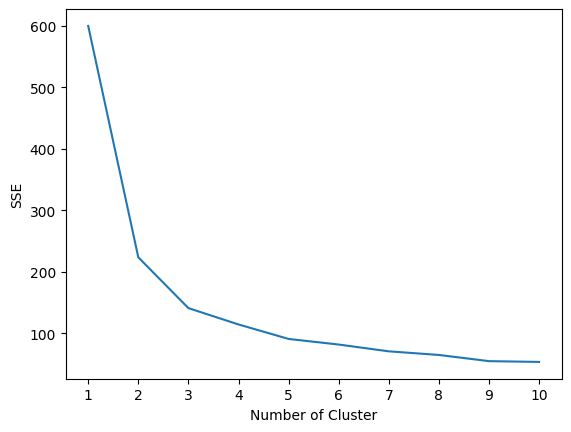

In [123]:
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [124]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [125]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

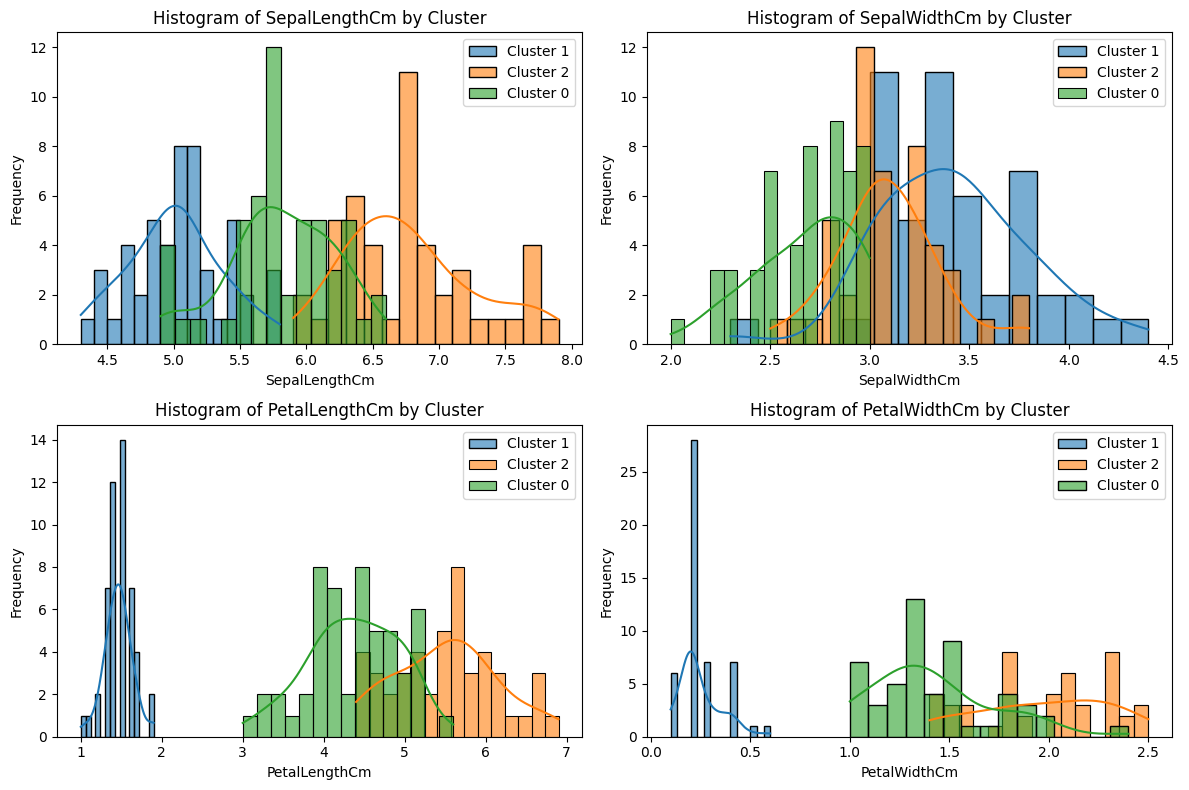

In [126]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i) 
    for cluster in df["Cluster"].unique():
        sns.histplot(df[df["Cluster"] == cluster][column], bins=15, kde=True, label=f"Cluster {cluster}", alpha=0.6)
    
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column} by Cluster")
    plt.legend()

plt.tight_layout()
plt.show()

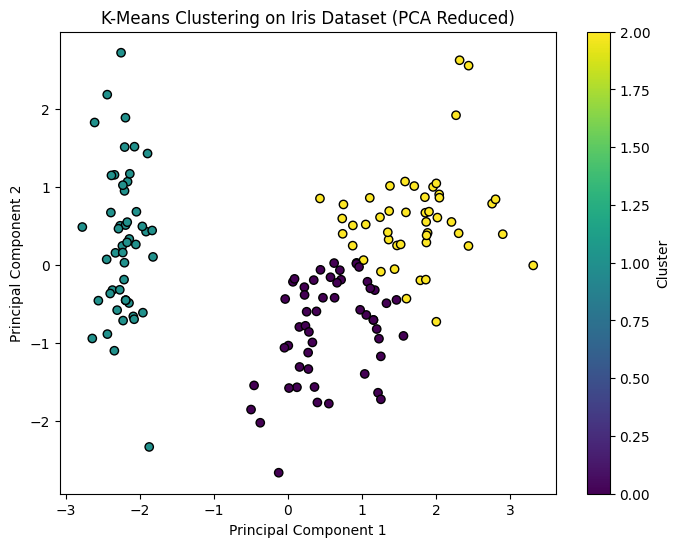

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis", edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on Iris Dataset (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_336\387424531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="viridis")
C:\Users\ACER\AppData\Local\Temp\ipykernel_336\387424531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="viridis")
C:\Users\ACER\AppData\Local\Temp\ipykernel_336\387424531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="viridis")
C:\Users\ACER\AppData\Local\Temp\ipykernel_336\387424531.py:4: FutureW

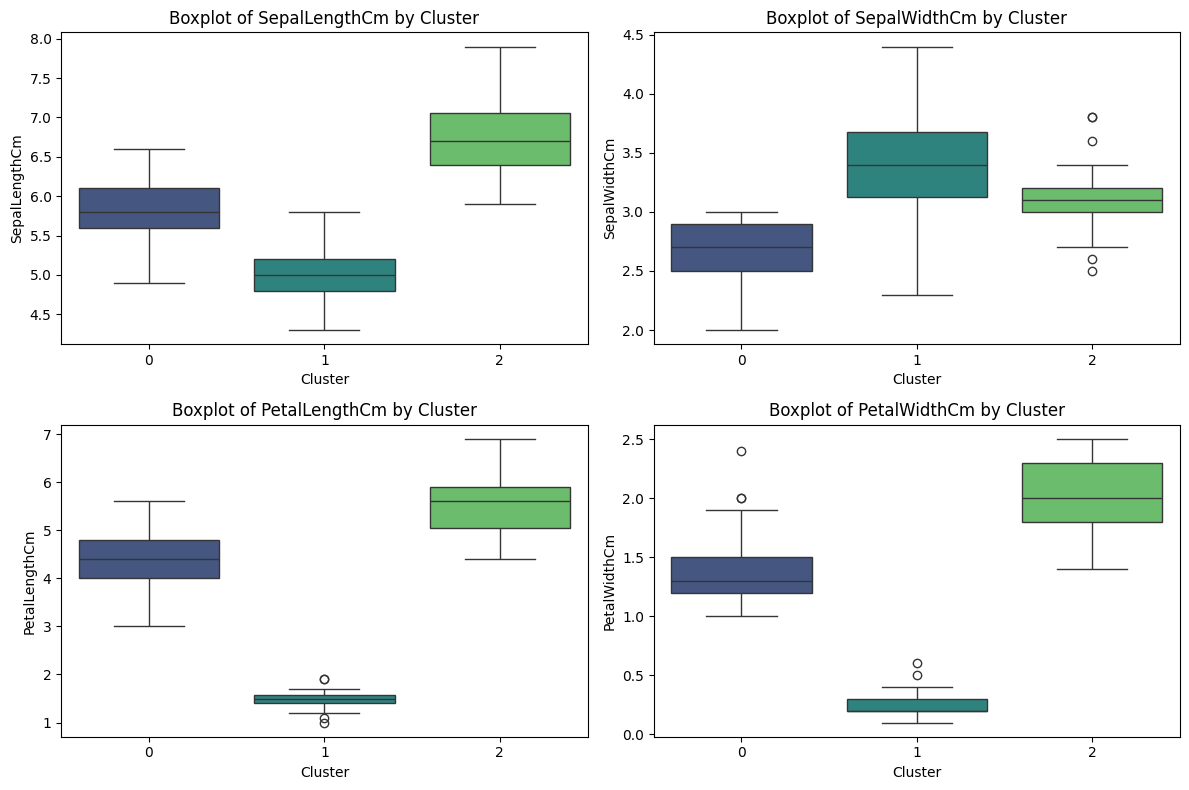

In [128]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    sns.boxplot(x=df["Cluster"], y=df[column], palette="viridis")
    plt.xlabel("Cluster")
    plt.ylabel(column)
    plt.title(f"Boxplot of {column} by Cluster")

plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_336\1881471573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Cluster"], y=df[column], palette="viridis", inner="quartile")
C:\Users\ACER\AppData\Local\Temp\ipykernel_336\1881471573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Cluster"], y=df[column], palette="viridis", inner="quartile")
C:\Users\ACER\AppData\Local\Temp\ipykernel_336\1881471573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Cluster"], y=df[column], palette="viridis", inner="quartile")
C:\U

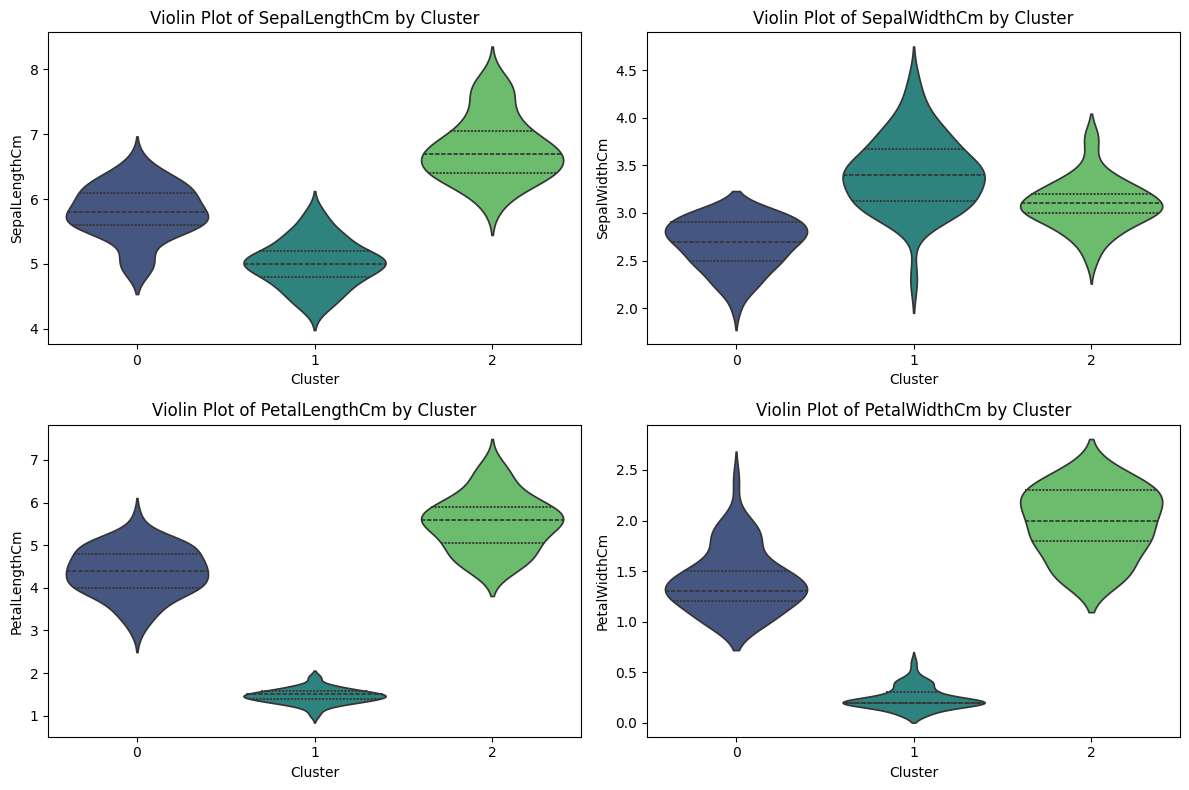

In [129]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    sns.violinplot(x=df["Cluster"], y=df[column], palette="viridis", inner="quartile")
    plt.xlabel("Cluster")
    plt.ylabel(column)
    plt.title(f"Violin Plot of {column} by Cluster")

plt.tight_layout()
plt.show()

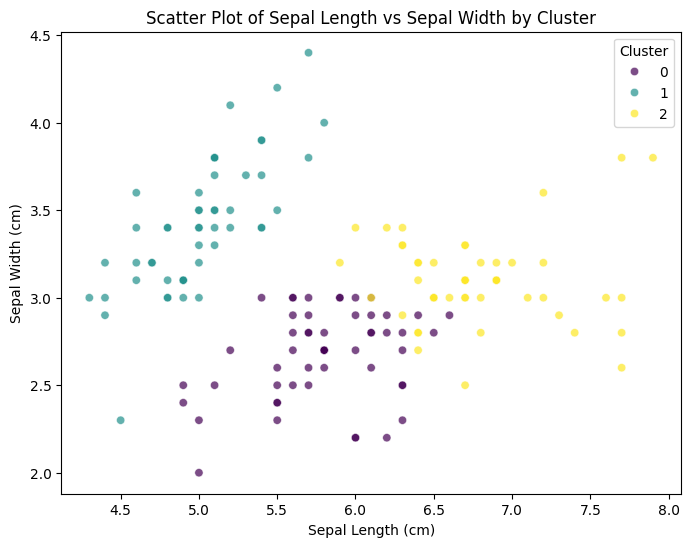

In [130]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot of Sepal Length vs Sepal Width by Cluster")
plt.legend(title="Cluster")
plt.show()

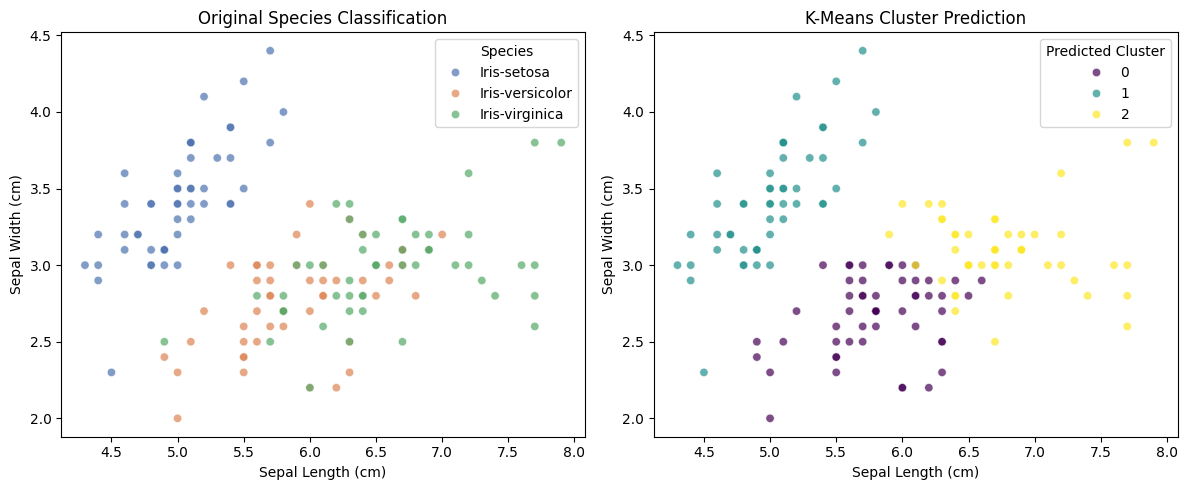

In [131]:
plt.figure(figsize=(12, 5))

# Original Species
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Species"], palette="deep", alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Original Species Classification")
plt.legend(title="Species")

# K-Means Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-Means Cluster Prediction")
plt.legend(title="Predicted Cluster")

plt.tight_layout()
plt.show()